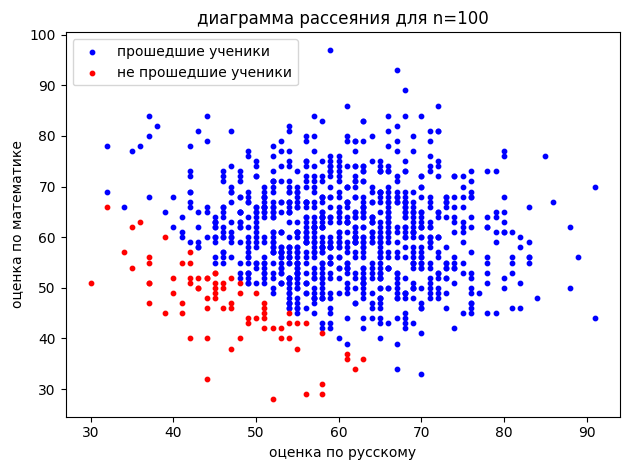

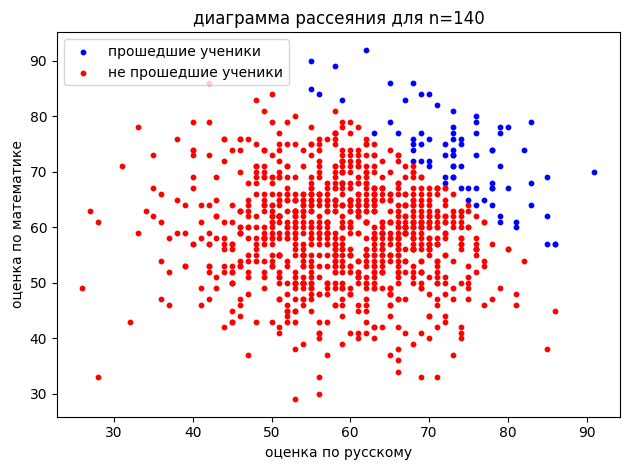

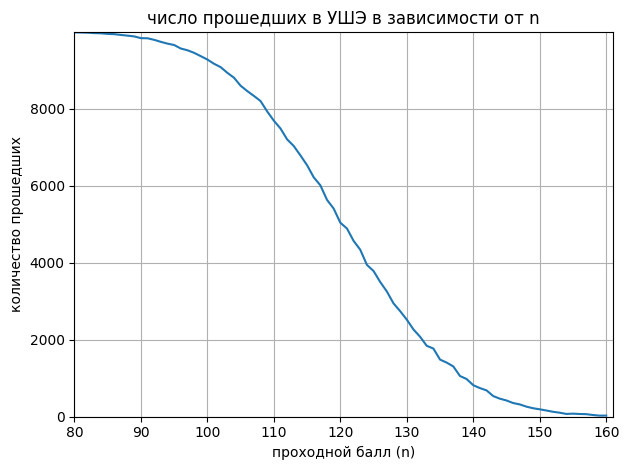

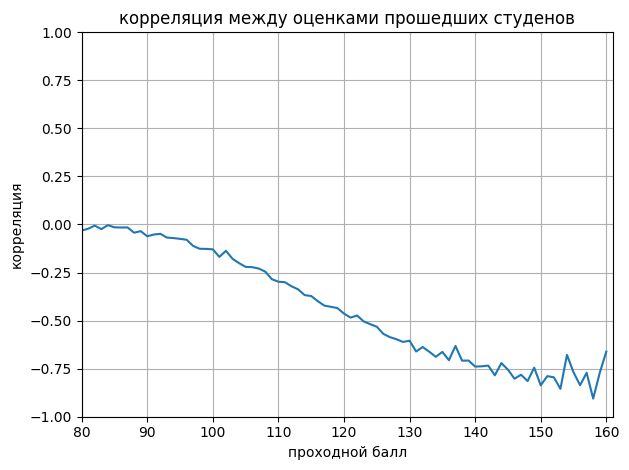

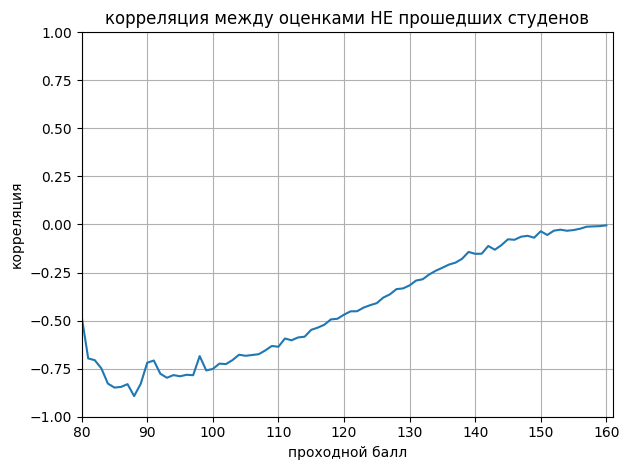

In [10]:
import random
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

random.seed(10)


def random_pupil() -> tuple[int, int]:
    return round(random.normalvariate(60, 10)), round(random.normalvariate(60, 10))


succeeded_count_list: list[int] = list()
succeeded_correlations: list[float] = list()
failed_correlations: list[float] = list()

for n in range(80, 160 + 1):
    pupils_count = 10 ** 4
    pupils_list: list[tuple[int, int]] = [random_pupil() for _ in range(pupils_count)]

    succeeded_pupils = list(filter(lambda x: (x[0] + x[1]) >= n, pupils_list))
    failed_pupils = list(filter(lambda x: (x[0] + x[1]) < n, pupils_list))

    succeeded_count_list.append(len(succeeded_pupils))

    def correlation(arr_2d: list[tuple[int, int]]):
        arr = np.array(arr_2d)
        x, y = arr.transpose()

        return stats.pearsonr(x, y)[0]

    # --- correlation calculation in `succeeded pupils` ---
    succeeded_correlations.append(correlation(succeeded_pupils))

    # --- correlation calculation in `failed pupils` ---
    failed_correlations.append(correlation(failed_pupils))


def scatter_graph(n: int):
    pupils_count = 1000
    pupils_list: list[tuple[int, int]] = [random_pupil() for _ in range(pupils_count)]

    succeeded_pupils = list(filter(lambda x: (x[0] + x[1]) >= n, pupils_list))
    failed_pupils = list(filter(lambda x: (x[0] + x[1]) < n, pupils_list))

    succ_x, succ_y = np.array(succeeded_pupils).transpose()
    fail_x, fail_y = np.array(failed_pupils).transpose()
    plt.scatter(succ_x, succ_y, color="blue", s=10, label="прошедшие ученики")
    plt.scatter(fail_x, fail_y, color="red", s=10, label="не прошедшие ученики")
    plt.title(f"диаграмма рассеяния для n={n}")
    plt.xlabel("оценка по русскому")
    plt.ylabel("оценка по математике")
    plt.legend()
    plt.show()

def graph1(values, y_bounds=None, title=None, xlabel=None, ylabel=None):
    x_start = 80
    x_end = x_start + len(values)

    x_coords = [i for i in range(x_start, x_end)]

    if not y_bounds:
        y_bottom = 0
        y_top = max(values)
    else:
        y_bottom, y_top = y_bounds

    plt.grid()
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(x_start, x_end)
    plt.ylim(y_bottom, y_top)

    plt.plot(x_coords, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


scatter_graph(100)
scatter_graph(140)

graph1(
    succeeded_count_list,
    title='число прошедших в УШЭ в зависимости от n',
    xlabel='проходной балл (n)',
    ylabel="количество прошедших"
)

graph1(
    succeeded_correlations, [-1, 1],
    title="корреляция между оценками прошедших студенов",
    xlabel="проходной балл",
    ylabel="корреляция"
)


graph1(
    failed_correlations, [-1, 1],
    title="корреляция между оценками НЕ прошедших студенов",
    xlabel="проходной балл",
    ylabel="корреляция"
)


Воспользуюсь двумя вспомогательными графиками (диаграммы рассеивания) для объяснения выводов.

При относительно небольшом n (1-ая диаграмма), большинство учеников из выборки проходит, поэтому между x и y практически нету корреляции.
Однако у тех кто не прошел, оценки по русскому и математике очень сильно обратно коррелируют друг с другом.

С повышением n (2-ая диаграмма), количество прошедших уменьшается, не прошедших увеличивается.
Происходит уже обратная предыдущей ситуация - оценки прошедших обратно коррелируют, а НЕ прошедших - нет.

Это подтвреждено на двух графиках корреляции.

В этом и состоит Парадокс Берксона - на корреляцию в выборке влияет и то, по каким правилам она отобрана.